<a href="https://colab.research.google.com/github/m-ikebe/git_turtorial/blob/main/MNIST_cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNISTを使用して判定するディープラーニングモデル開発

---



In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

import matplotlib.pyplot as plt
import numpy as np                                                              # 数値計算を効率的に行うためのライブラリ


(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(x_train.shape)  # トレーニングデータ
print(x_test.shape)   # 検証データ
print(y_train.shape)  # トレーニング正解ラベル
print(y_test.shape)   # 検証正解ラベル

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


正解ラベル： 8


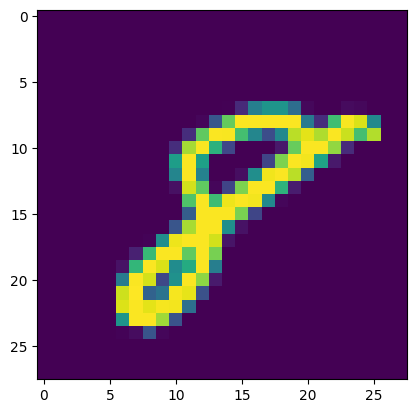

In [5]:
cnt = 1013
print ("正解ラベル：" , y_train[cnt])
# print (x_train[cnt])
plt.imshow(x_train[cnt])
plt.show()

#入力層用にデータを加工


In [4]:
print(28*28)

#入力層用に3次元配列を2次元配列に加工
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)

#要素を0～1の範囲になるよう変換
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

784


#ニューラルネットワーク作成

In [5]:
# 正解ラベルをワンホット表現に変換
num_cloasses = 10
y_train = keras.utils.to_categorical(y_train,num_cloasses)
y_test = keras.utils.to_categorical(y_test,num_cloasses)
print(y_train[cnt])

model = Sequential()  # ニューラルネットワークの元になるオブジェクト生成

# 第１層の作成
model.add(Dense(512,activation='relu',input_shape=(28*28,)))

# ドロップアウト率を20％にする
model.add(Dropout(0.2))

# 出力層の作成
model.add(Dense(num_cloasses,activation='softmax'))

# 誤差逆伝播（バックプロパゲーション）を実装
model.compile(loss='categorical_crossentropy'  # 誤差関数を交差エントロピー誤差
              ,optimizer=Adam()             # 学習方法をAdamにする
              ,metrics=['accuracy'])           # 学習評価には正解率を使う

# ニューラルネットワークの構造を出力
model.summary()

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

#ディープラーニングを実行

In [6]:
batch = 50
epochs = 5

history = model.fit(x_train,                          # 訓練データ
                    y_train,                          # 正解ラベル
                    batch_size = batch,               # ミニバッチのサイズ
                    epochs = epochs,                  # 学習する回数
                    verbose = 1,                      # 学習の進捗状況を出力する
                    validation_data = (x_test,y_test) # 検証データの指定
                    )


Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8839 - loss: 0.3941 - val_accuracy: 0.9663 - val_loss: 0.1176
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9685 - loss: 0.1049 - val_accuracy: 0.9737 - val_loss: 0.0816
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9778 - loss: 0.0711 - val_accuracy: 0.9772 - val_loss: 0.0739
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9830 - loss: 0.0549 - val_accuracy: 0.9811 - val_loss: 0.0631
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9862 - loss: 0.0413 - val_accuracy: 0.9812 - val_loss: 0.0612


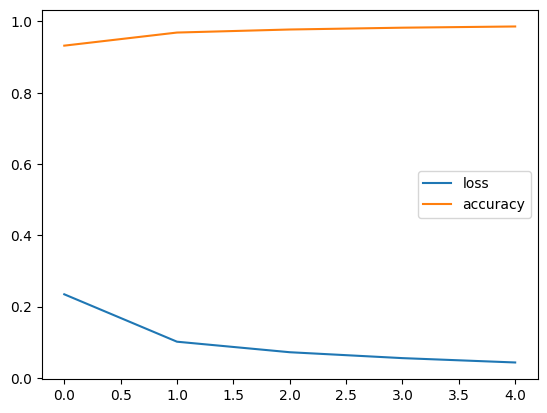

In [7]:
hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 検証用データの誤差

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

loss (誤差)

曲線: 通常、訓練が進むにつれて値が小さくなることを示します。

意味: モデルが訓練データに対してどれだけ正確に予測できているかを表します。誤差が低いほど、モデルの予測が正しいことを意味します。グラフが右下がりになっていれば、モデルが順調に学習していることを示します。

accuracy (正解率)

曲線: 通常、訓練が進むにつれて値が大きくなります。

意味: モデルが訓練データに対してどれだけ多くのデータを正しく分類できたかを表します。正解率が高いほど、モデルの性能が良いことを示します。グラフが右上がりになっていれば、モデルの性能が向上していることを示します。

グラフから読み取れること
訓練の進捗:

loss曲線が下がり続け、accuracy曲線が上がり続けていれば、モデルがまだ学習を続けており、さらに性能が向上する可能性があります。

過学習 (Overfitting):

もし、lossは下がり続けているのに、accuracyの曲線が途中で横ばいになったり、下がり始めたりした場合、それは過学習の兆候です。過学習とは、モデルが訓練データに過剰に適応してしまい、未知のデータに対する予測性能が低下している状態を指します。

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


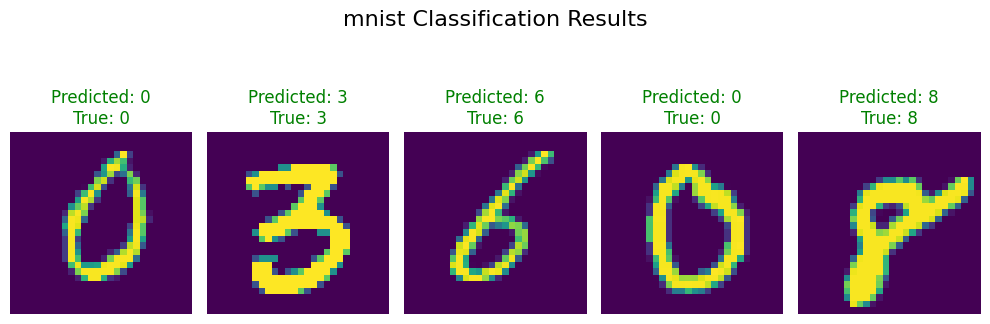

In [ ]:
# 分類結果の可視化
# mnistのラベル名
mnist_labels = ["0", "1", "2", "3", "4",
                "5", "6", "7", "8", "9"]

# テストデータからランダムに5つの画像を選択
indices = np.random.choice(range(len(x_test)), 5, replace=False)
predictions = model.predict(x_test[indices])

plt.figure(figsize=(10, 4))
for i, index in enumerate(indices):
    plt.subplot(1, 5, i + 1)

    # 元の画像を表示 (形状を28x28に戻す)
    plt.imshow(x_test[index].reshape(28, 28))

    # 予測結果と正解ラベルを取得
    predicted_label = np.argmax(predictions[i])
    # y_testはワンホットエンコーディングされているため、argmaxで元のラベルを取得
    true_label = np.argmax(y_test[index])

    # タイトルに予測と正解を表示
    title_color = "green" if predicted_label == true_label else "red"
    plt.title(f"Predicted: {mnist_labels[predicted_label]}\nTrue: {mnist_labels[true_label]}",
              color=title_color)

    plt.axis('off')

plt.suptitle("mnist Classification Results", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted digit is: 1


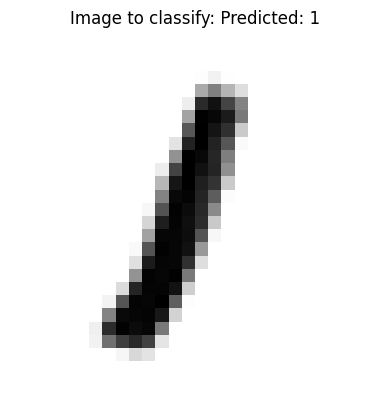

In [ ]:
from PIL import Image

# 画像を読み込む
try:
    img = Image.open("1.png").convert('L') # グレースケールに変換
    # 28x28にリサイズ
    img = img.resize((28, 28))

    # numpy配列に変換
    img_array = np.array(img)

    #print(img_array)
    # イメージを反転
    img_array = 255 - img_array
    #print(img_array)


    img_array = img_array.reshape(1, 28*28) # モデル用に形状を変更
    img_array = img_array.astype('float32') / 255 # ピクセル値をスケール変換


    # 予測を行う
    prediction = model.predict(img_array)

    # 予測されたラベルを取得
    predicted_label_index = np.argmax(prediction)
    predicted_label = mnist_labels[predicted_label_index]

    print(f"The predicted digit is: {predicted_label}")

    # 画像を表示
    plt.imshow(img, cmap='gray')
    plt.title(f"Image to classify: Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print("エラー: pngが見つかりません。画像ファイルが正しいディレクトリにあることを確認してください。")
except Exception as e:
    print(f"エラーが発生しました: {e}")